# 2024 OIBC Challenge
## (Deep Learning version skeleton 03)

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from functools import reduce
import os
from datetime import datetime, timedelta
from tqdm import tqdm

### 데이터 전처리

In [2]:
print(os.getcwd())  # 현재 작업 경로 출력

f:\For me\Project\24-OIBC-WolgoksTears\personal_files\hoon


actual_weather_1

In [3]:
# 데이터 불러오기
actual_weather_1 = pd.read_csv("../../data_files/actual_weather_1.csv")

# 'ts'를 datetime 형식으로 변환 후 1시간 단위로 맞추기
actual_weather_1['datetime'] = pd.to_datetime(actual_weather_1['ts'], unit='s')
actual_weather_1['datetime'] = actual_weather_1['datetime'].dt.round('h') + timedelta(hours=9)

# 원래 'ts' 열과 'location' 제거
actual_weather_1.drop(columns=['ts'], inplace=True)
actual_weather_1.drop(columns=['location'], inplace=True)

# 1시간 단위로 그룹화하여 평균을 계산 (location을 제외한 모든 열)
actual_weather_1 = actual_weather_1.groupby(['datetime'], as_index=False).mean()


# weather_forecast에 없는 columns 제거
actual_weather_1.drop(columns=['real_feel_temp_shade'], inplace=True)
actual_weather_1.drop(columns=['pressure'], inplace=True)
actual_weather_1.drop(columns=['appr_temp'], inplace=True)
actual_weather_1.drop(columns=['wind_chill_temp'], inplace=True)
 
# 결과 확인
actual_weather_1.head()

,datetime,temp,real_feel_temp,rel_hum,dew_point,wind_dir,wind_spd,wind_gust_spd,uv_idx,vis,cld_cvr,ceiling,wet_bulb_temp,precip_1h
0,2024-03-01 00:00:00,8.500000,8.000000,81.000000,5.500000,270.000000,6.100000,17.600000,0.0,20.900000,91.000000,579.000000,7.100000,0.100000
1,2024-03-01 01:00:00,7.158333,3.041667,72.666667,2.508333,234.666667,20.483333,26.366667,0.0,20.783333,97.750000,693.416667,5.091667,0.008333
2,2024-03-01 02:00:00,6.477778,2.111111,75.666667,2.433333,262.888889,21.944444,27.433333,0.0,20.033333,86.333333,616.222222,4.733333,0.011111
3,2024-03-01 03:00:00,6.045455,0.900000,74.545455,1.663636,213.000000,22.490909,27.645455,0.0,19.900000,62.818182,8692.363636,4.209091,0.136364
4,2024-03-01 04:00:00,5.430000,-0.090000,68.100000,-0.030000,256.800000,26.140000,42.440000,0.0,23.800000,38.100000,10911.800000,3.180000,0.410000


weather_forecast_1

In [4]:
# 데이터 불러오기
weather_forecast_1 = pd.read_csv("../../data_files/weather_forecast_1.csv")

# 'ts'를 datetime 형식으로 변환 후 1시간 단위로 맞추기
weather_forecast_1['datetime'] = pd.to_datetime(weather_forecast_1['ts'], unit='s')
weather_forecast_1['datetime'] = weather_forecast_1['datetime'].dt.round('h') + timedelta(hours=9)

# 원래 'ts' 열 제거, 'base_ts' 열 제거, 'location' 제거
weather_forecast_1.drop(columns=['ts'], inplace=True)
weather_forecast_1.drop(columns=['base_ts'], inplace=True)
weather_forecast_1.drop(columns=['location'], inplace=True)

# 1시간 단위로 그룹화하여 평균을 계산 (location을 제외한 모든 열)
weather_forecast_1 = weather_forecast_1.groupby(['datetime'], as_index=False).mean()


# 예보 데이터의 columns 순서를 actual_weather columns 순서와 맞추기
weather_forecast_1 = weather_forecast_1[['datetime', 'temp', 'real_feel_temp', 'rel_hum',
       'dew_point', 'wind_dir', 'wind_spd', 'wind_gust_spd', 'uv_idx', 'vis',
       'cld_cvr', 'ceiling', 'wet_bulb_temp', 'total_liq']]
weather_forecast_1['precip_1h'] = weather_forecast_1['total_liq']
weather_forecast_1.drop(columns=['total_liq'], inplace=True)  

# 결과 확인
weather_forecast_1.head()

,datetime,temp,real_feel_temp,rel_hum,dew_point,wind_dir,wind_spd,wind_gust_spd,uv_idx,vis,cld_cvr,ceiling,wet_bulb_temp,precip_1h
0,2024-03-02 00:00:00,1.728394,-4.320987,64.333333,-4.320987,335.555556,22.048022,50.604944,0.0,16.093400,75.555556,1700.106667,-0.555556,0.000000
1,2024-03-02 01:00:00,1.851852,-4.506173,64.333333,-4.135800,335.000000,22.048022,50.640711,0.0,15.378140,84.777778,1249.680000,-0.432099,0.056444
2,2024-03-02 02:00:00,1.790123,-5.061728,66.333333,-3.950616,334.444444,22.656000,51.481144,0.0,14.392882,89.333333,1229.360000,-0.370370,0.197556
3,2024-03-02 03:00:00,1.604940,-5.308640,67.333333,-3.888887,333.777778,23.263967,51.463267,0.0,15.195758,94.555556,1933.786667,-0.370370,0.084667
4,2024-03-02 04:00:00,1.851852,-4.876541,66.444444,-3.950616,333.888889,23.871922,50.837400,0.0,15.825200,82.555556,2600.960000,-0.308642,0.000000


actual_weather_2

In [5]:
# 데이터 불러오기
actual_weather_2 = pd.read_csv("../../data_files/actual_weather_2.csv")

# 'ts'를 datetime 형식으로 변환 후 1시간 단위로 맞추기
actual_weather_2['datetime'] = pd.to_datetime(actual_weather_2['ts'], unit='s')
actual_weather_2['datetime'] = actual_weather_2['datetime'].dt.round('h') + timedelta(hours=9)

# 원래 'ts' 열과 'location' 제거
actual_weather_2.drop(columns=['ts'], inplace=True)
actual_weather_2.drop(columns=['location'], inplace=True)

# 1시간 단위로 그룹화하여 평균을 계산 (location을 제외한 모든 열)
actual_weather_2 = actual_weather_2.groupby(['datetime'], as_index=False).mean()
 
# 결과 확인
actual_weather_2.head()

,datetime,cloud,temp,temp_max,temp_min,humidity,ground_press,wind_speed,wind_dir,rain,snow
0,2024-03-01 00:00:00,89.333333,6.146667,6.146667,6.146667,74.666667,1022.666667,8.553333,345.333333,0.17,0.0
1,2024-03-01 01:00:00,83.500000,6.255000,6.255000,6.255000,70.500000,1022.500000,6.256667,342.000000,0.00,0.0
2,2024-03-01 02:00:00,84.333333,5.926667,5.926667,5.926667,67.833333,1022.833333,7.291667,343.000000,0.21,0.0
3,2024-03-01 03:00:00,83.666667,5.198333,5.198333,5.198333,63.833333,1023.500000,7.520000,342.333333,0.00,0.0
4,2024-03-01 04:00:00,42.166667,4.433333,4.433333,4.433333,64.833333,1023.833333,7.330000,342.000000,0.00,0.0


weather_forecast_2

In [6]:
# 데이터 불러오기
weather_forecast_2 = pd.read_csv("../../data_files/weather_forecast_2.csv")

# 'ts'를 datetime 형식으로 변환 후 1시간 단위로 맞추기
weather_forecast_2['datetime'] = pd.to_datetime(weather_forecast_2['ts'], unit='s')
weather_forecast_2['datetime'] = weather_forecast_2['datetime'].dt.round('h') + timedelta(hours=9)

# 원래 'ts' 열과 'location' 제거, 'base_ts' 제거
weather_forecast_2.drop(columns=['ts'], inplace=True)
weather_forecast_2.drop(columns=['location'], inplace=True)
weather_forecast_2.drop(columns=['base_ts'], inplace=True)

# 1시간 단위로 그룹화하여 평균을 계산 (location을 제외한 모든 열)
weather_forecast_2 = weather_forecast_2.groupby(['datetime'], as_index=False).mean()
 
# 결과 확인
weather_forecast_2.head()

,datetime,cloud,temp,temp_max,temp_min,humidity,ground_press,wind_speed,wind_dir,rain,snow
0,2024-03-02 00:00:00,100.000000,1.213333,1.213333,1.213333,60.333333,1027.000000,8.306667,332.333333,0.0,0.0
1,2024-03-02 01:00:00,100.000000,1.280000,1.280000,1.280000,61.000000,1027.000000,8.043333,333.666667,0.0,0.0
2,2024-03-02 02:00:00,100.000000,1.323333,1.323333,1.323333,60.666667,1026.666667,7.626667,333.000000,0.0,0.0
3,2024-03-02 03:00:00,100.000000,1.323333,1.323333,1.323333,60.666667,1026.000000,7.310000,332.666667,0.0,0.0
4,2024-03-02 04:00:00,96.333333,1.356667,1.356667,1.356667,60.666667,1026.000000,7.076667,331.666667,0.0,0.0


elec_supply

In [7]:
# 데이터 불러오기
elec_supply = pd.read_csv("../../data_files/elec_supply.csv")

# 'ts'를 datetime 형식으로 변환 후 1시간 단위로 맞추기
elec_supply['datetime'] = pd.to_datetime(elec_supply['ts'], unit='s')
elec_supply['datetime'] = elec_supply['datetime'].dt.round('h') + timedelta(hours=9)

# 1시간 단위로 그룹화하여 평균을 계산
elec_supply = elec_supply.groupby(['datetime'], as_index=False).mean()

# 결과 확인
elec_supply.drop(columns=['ts'], inplace=True)  # 원래 'ts' 열 제거
elec_supply.head()

,datetime,공급능력(kW),현재 수요(kW),태양광 발전량kW),풍력 발전량(kW),신재생 발전량 총합(kW),공급 예비력(kW),운영 예비력(kW)
0,2024-01-01 00:00:00,1.285000e+06,757500.000000,0.0,115593.233333,123350.666667,527166.666667,328500.000000
1,2024-01-01 01:00:00,1.238308e+06,727538.461538,0.0,68802.153846,77036.569231,510692.307692,312692.307692
2,2024-01-01 02:00:00,1.214818e+06,694090.909091,0.0,45923.181818,53740.109091,520727.272727,318545.454545
3,2024-01-01 03:00:00,1.207923e+06,672000.000000,0.0,38567.161538,46614.815385,536000.000000,291000.000000
4,2024-01-01 04:00:00,1.192364e+06,666000.000000,0.0,22849.272727,30575.990909,526363.636364,318272.727273


smp_da

In [8]:
# 데이터 불러오기
smp_da = pd.read_csv("../../data_files/smp_da.csv")

# 'ts'를 datetime 형식으로 변환 후 1시간 단위로 맞추기
smp_da['datetime'] = pd.to_datetime(smp_da['ts'], unit='s') + timedelta(hours=9)

# 결과 확인
smp_da.drop(columns=['ts'], inplace=True)  # 원래 'ts' 열 제거
smp_da.head()

,하루전가격(원/kWh),datetime
0,107.39,2024-03-01 00:00:00
1,107.39,2024-03-01 01:00:00
2,95.30,2024-03-01 02:00:00
3,87.89,2024-03-01 03:00:00
4,0.00,2024-03-01 04:00:00


smp_rt_rc

In [9]:
# 데이터 불러오기
smp_rt_rc = pd.read_csv("../../data_files/smp_rt_rc.csv")

# 'ts'를 datetime 형식으로 변환 후 1시간 단위로 맞추기
smp_rt_rc['datetime'] = pd.to_datetime(smp_rt_rc['ts'], unit='s')
smp_rt_rc['datetime'] = smp_rt_rc['datetime'].dt.round('h') + timedelta(hours=9)

# 1시간 단위로 그룹화하여 평균을 계산
smp_rt_rc = smp_rt_rc.groupby(['datetime'], as_index=False).mean()

# 결과 확인
smp_rt_rc.drop(columns=['ts'], inplace=True)  # 원래 'ts' 열 제거
smp_rt_rc.head()

,datetime,실시간 임시 가격(원/kWh),실시간 확정 가격(원/kWh)
0,2024-03-01 00:00:00,133.125,133.125
1,2024-03-01 01:00:00,115.160,115.160
2,2024-03-01 02:00:00,92.830,92.830
3,2024-03-01 03:00:00,87.334,87.334
4,2024-03-01 04:00:00,87.260,87.260


##### X 데이터

- 제주 기상 실측_1 (n+1)
- 제주 기상 실측_2 (n+1)
- 하루 전 시장 전기 예측 (n)
- 제주 전력 시장 실시간 (n-1)
- 제주 전력 시장 현황 (n-1)

In [10]:
actual_weather_1
actual_weather_2
weather_forecast_1
weather_forecast_2
smp_da_x = smp_da.copy()
smp_da_x['datetime'] += pd.Timedelta(days=1)
smp_rt_rc['datetime'] += pd.Timedelta(days=2)
elec_supply['datetime'] += pd.Timedelta(days=2)

In [11]:
dfs = [actual_weather_1, actual_weather_2, smp_da_x, smp_rt_rc, elec_supply]

X = reduce(lambda left, right: pd.merge(left, right, on='datetime', how='outer'), dfs)

##### Y 데이터

- 하루 전 시장 전기 예측 가격(n+1)

In [12]:
Y = smp_da

##### 날짜 설정

In [13]:
target_date = {
  # 최소 2024-03-04
  "train_start_date": '2024-03-03',
  # 최대 2024-10-22
  "train_end_date": '2024-10-22',
}

In [14]:
X = X.loc[
  (X['datetime'] > target_date['train_start_date']) &
  (X['datetime'] <= target_date['train_end_date'])
]

In [15]:
Y = Y.loc[
  (Y['datetime'] > target_date['train_start_date']) &
  (Y['datetime'] <= target_date['train_end_date'])
]

In [16]:
from datetime import datetime, timedelta

targ = datetime.strptime(target_date['train_start_date'], '%Y-%m-%d') + timedelta(hours=1)
endd = datetime.strptime(target_date['train_end_date'], '%Y-%m-%d')

print(targ, endd)

2024-03-03 01:00:00 2024-10-22 00:00:00


In [17]:
# X 데이터의 특정 시간이 누락되었기 때문에
# Y 데이터에서도 누락된 시간대를 제거한다.

while targ <= endd:
  if not len(X.loc[X['datetime'] == targ]):
    idx = Y[Y['datetime'] == targ].index
    Y.drop(idx, inplace=True)
  
  targ = targ + timedelta(hours=1)

In [18]:
X.head()

,datetime,temp_x,real_feel_temp,rel_hum,dew_point,wind_dir_x,wind_spd,wind_gust_spd,uv_idx,vis,...,하루전가격(원/kWh),실시간 임시 가격(원/kWh),실시간 확정 가격(원/kWh),공급능력(kW),현재 수요(kW),태양광 발전량kW),풍력 발전량(kW),신재생 발전량 총합(kW),공급 예비력(kW),운영 예비력(kW)
1441,2024-03-03 01:00:00,4.962500,1.650000,56.125000,-3.112500,246.375000,16.912500,24.993750,0.0,25.937500,...,138.50,115.160,115.160,1.367154e+06,764692.307692,0.0,213928.384615,229070.230769,602692.307692,279846.153846
1442,2024-03-03 02:00:00,4.836364,0.918182,57.727273,-2.918182,245.727273,18.227273,22.754545,0.0,25.027273,...,99.48,92.830,92.830,1.389455e+06,736818.181818,0.0,234674.181818,249718.181818,652636.363636,328090.909091
1443,2024-03-03 03:00:00,4.666667,1.811111,57.777778,-3.011111,250.222222,15.344444,20.266667,0.0,23.255556,...,95.38,87.334,87.334,1.370923e+06,733461.538462,0.0,216275.153846,231237.153846,637384.615385,312538.461538
1444,2024-03-03 04:00:00,4.910000,1.240000,58.400000,-2.670000,256.600000,18.270000,28.230000,0.0,26.060000,...,91.24,87.260,87.260,1.378545e+06,744000.000000,0.0,223340.090909,238393.363636,634818.181818,309636.363636
1445,2024-03-03 05:00:00,5.516667,2.708333,56.833333,-2.525000,257.083333,16.166667,19.816667,0.0,22.541667,...,91.24,93.352,93.352,1.391462e+06,756538.461538,0.0,235738.000000,250772.615385,634923.076923,308615.384615


In [19]:
len(X), len(Y)

(5592, 5592)

### 파이토치 모델 구성

##### 모듈 임포트

In [20]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from sklearn.preprocessing import MinMaxScaler

In [21]:
if torch.cuda.is_available():
  print(torch.cuda.get_device_name())
  print(torch.__version__)
  print(torch.version.cuda)
  x = torch.randn(1).cuda()
  print(x)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

NVIDIA GeForce GTX 1650
2.5.0+cu118
11.8
tensor([-1.2769], device='cuda:0')


device(type='cuda', index=0)

##### Dataset 구성

In [22]:
class ElecDataset(Dataset):
  def __init__(self, x_data, y_data):
    scaler = MinMaxScaler()

    columns_to_scale = x_data.columns[1:]
    x_data[columns_to_scale] = scaler.fit_transform(x_data[columns_to_scale])
    
    self.x_data = x_data.fillna(0)
    self.y_data = y_data.fillna(0)

  def __getitem__(self, index):
    target_y = self.y_data['하루전가격(원/kWh)'].iloc[index]
    targets = self.x_data.drop(columns='datetime').iloc[index].to_numpy()

    return torch.from_numpy(targets), torch.tensor(target_y)

  def __len__(self):
    return int(len(self.y_data))

In [23]:
dataset = ElecDataset(X, Y)

In [24]:
len(dataset)

5592

##### dataloader 구성

In [25]:
dataloader = DataLoader(dataset=dataset,
                        batch_size=32,
                        shuffle=True,
                        drop_last=False)

##### 모델 구성

In [26]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, output_size):
        super(NeuralNetwork, self).__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(input_size, 128, dtype=torch.float64),
            nn.ReLU(),
            nn.Linear(128, 256, dtype=torch.float64),
            nn.ReLU(),
            nn.Linear(256, 256, dtype=torch.float64),
            nn.ReLU(),
            nn.Linear(256, 256, dtype=torch.float64),
            nn.ReLU(),
            nn.Linear(256, 256, dtype=torch.float64),
            nn.ReLU(),
            nn.Linear(256, 128, dtype=torch.float64),
            nn.ReLU(),
            nn.Linear(128, 32, dtype=torch.float64),
            nn.ReLU(),
            nn.Linear(32, 8, dtype=torch.float64),
            nn.ReLU(),
            nn.Linear(8, output_size, dtype=torch.float64)
        )

    def forward(self, x):
        out = self.linear_relu_stack(x)

        return out 

In [27]:
def customloss(predict, y):#학습용
    predict = predict.squeeze()

    e1 = torch.zeros_like(y)
    e2 = torch.zeros_like(y)
    accuracy = torch.zeros_like(y, dtype=torch.bool)

    positive_mask = y > 0
    negative_mask = y <= 0

    e1_mask = y > 0  # y > 0인 부분 마스크
    e2_mask = y < -1  # y <= 0인 부분 마스크
    e2_adjusted_mask = (y <= 0) & (y >= -1)
    # 각 마스크 조건에 맞는 부분에 대해서만 e1, e2를 계산합니다.
    # e1과 e2에서 분모에 작은 상수를 추가하여 0으로 나누는 것을 방지
    e1[e1_mask] = torch.abs((y[e1_mask] - predict[e1_mask]) / (y[e1_mask]))
    e2[e2_mask] = torch.abs((y[e2_mask] - predict[e2_mask]) / (-y[e2_mask]))
    e2[e2_adjusted_mask] = torch.abs((y[e2_adjusted_mask] - predict[e2_adjusted_mask]) / (-1))

    accuracy[positive_mask] = (predict[positive_mask] > 0)
    accuracy[negative_mask] = (predict[negative_mask] <= 0)

    e1_mean = e1[e1 != 0].mean() if (e1 != 0).any() else torch.tensor(0.0)
    e2_mean = e2[e2 != 0].mean() if (e2 != 0).any() else torch.tensor(0.0)

    accuracy_mean = accuracy.float().mean()

    e_F = 0.2 * e1_mean + 0.8 * e2_mean - (accuracy_mean - 0.95)
    if e_F<0:
      e_F=0
    e_F_square = e_F**2
    mse_loss = torch.mean((y - predict)**2)

    loss_new = 0
    if predict.mean()>140:
      loss_new += predict.mean()-140

    loss_new = loss_new ** 2

    return e_F_square*10+mse_loss+loss_new

In [28]:
input_size = len(X.columns) - 1  # Number of input features
output_size = 1  # Single output


model = NeuralNetwork(input_size, output_size)


criterion = customloss # nn.MSELoss()

##### 학습

In [29]:
def train(model, train_loader, criterion, optimizer, num_epochs, device):
    model = model.to(device)  # Move model to GPU/CPU

    train_history = []
    
    for epoch in range(num_epochs):
        model.train()  # Set the model to training mode
        
        running_loss = 0.0  # To keep track of loss
        for inputs, targets in tqdm(train_loader, ncols=100):

            # Move data to the same device as the model
            inputs, targets = inputs.to(device), targets.to(device)
            
            # Forward pass
            outputs = model(inputs)

            loss = criterion(outputs, targets)

            # Backward pass and optimization
            optimizer.zero_grad()  # Clear the gradients
            loss.backward()        # Compute gradients
            # torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            optimizer.step()        # Update model parameters

            running_loss += loss.item()
            
            # print(loss.item())

        # Print the loss after each epoch
        avg_loss = running_loss / len(train_loader)
        train_history.append(avg_loss)
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}")

    print("Training complete.")
    return model, train_history

##### 하이퍼 파라미터

In [30]:
learning_rate = 0.0003
epoches=100

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [31]:
model, train_history = train(model, dataloader, criterion, optimizer, epoches, device)

100%|█████████████████████████████████████████████████████████████| 175/175 [00:12<00:00, 13.98it/s]


Epoch [1/100], Loss: 14409.6778


100%|█████████████████████████████████████████████████████████████| 175/175 [00:11<00:00, 15.05it/s]


Epoch [2/100], Loss: 11467.1872


100%|█████████████████████████████████████████████████████████████| 175/175 [00:11<00:00, 15.00it/s]


Epoch [3/100], Loss: 7340.6690


100%|█████████████████████████████████████████████████████████████| 175/175 [00:11<00:00, 15.11it/s]


Epoch [4/100], Loss: 6274.7793


100%|█████████████████████████████████████████████████████████████| 175/175 [00:11<00:00, 15.13it/s]


Epoch [5/100], Loss: 5758.4077


100%|█████████████████████████████████████████████████████████████| 175/175 [00:11<00:00, 15.01it/s]


Epoch [6/100], Loss: 4531.1481


100%|█████████████████████████████████████████████████████████████| 175/175 [00:12<00:00, 14.21it/s]


Epoch [7/100], Loss: 4225.1856


100%|█████████████████████████████████████████████████████████████| 175/175 [00:12<00:00, 14.52it/s]


Epoch [8/100], Loss: 4650.6065


100%|█████████████████████████████████████████████████████████████| 175/175 [00:11<00:00, 14.79it/s]


Epoch [9/100], Loss: 4050.0223


100%|█████████████████████████████████████████████████████████████| 175/175 [00:11<00:00, 14.95it/s]


Epoch [10/100], Loss: 4092.7018


100%|█████████████████████████████████████████████████████████████| 175/175 [00:12<00:00, 14.37it/s]


Epoch [11/100], Loss: 5086.5383


100%|█████████████████████████████████████████████████████████████| 175/175 [00:11<00:00, 14.76it/s]


Epoch [12/100], Loss: 3987.7254


100%|█████████████████████████████████████████████████████████████| 175/175 [00:12<00:00, 14.39it/s]


Epoch [13/100], Loss: 3487.3656


100%|█████████████████████████████████████████████████████████████| 175/175 [00:11<00:00, 15.21it/s]


Epoch [14/100], Loss: 4409.9330


100%|█████████████████████████████████████████████████████████████| 175/175 [00:11<00:00, 15.36it/s]


Epoch [15/100], Loss: 4244.1861


100%|█████████████████████████████████████████████████████████████| 175/175 [00:11<00:00, 14.95it/s]


Epoch [16/100], Loss: 3941.1181


100%|█████████████████████████████████████████████████████████████| 175/175 [00:11<00:00, 15.27it/s]


Epoch [17/100], Loss: 3995.8364


100%|█████████████████████████████████████████████████████████████| 175/175 [00:11<00:00, 15.30it/s]


Epoch [18/100], Loss: 3273.3764


100%|█████████████████████████████████████████████████████████████| 175/175 [00:11<00:00, 15.25it/s]


Epoch [19/100], Loss: 3423.5525


100%|█████████████████████████████████████████████████████████████| 175/175 [00:11<00:00, 15.32it/s]


Epoch [20/100], Loss: 3763.8198


100%|█████████████████████████████████████████████████████████████| 175/175 [00:11<00:00, 15.34it/s]


Epoch [21/100], Loss: 2770.2619


100%|█████████████████████████████████████████████████████████████| 175/175 [00:11<00:00, 15.43it/s]


Epoch [22/100], Loss: 3213.5377


100%|█████████████████████████████████████████████████████████████| 175/175 [00:11<00:00, 15.37it/s]


Epoch [23/100], Loss: 3645.4707


100%|█████████████████████████████████████████████████████████████| 175/175 [00:11<00:00, 15.34it/s]


Epoch [24/100], Loss: 2744.0029


100%|█████████████████████████████████████████████████████████████| 175/175 [00:11<00:00, 15.34it/s]


Epoch [25/100], Loss: 3137.0591


100%|█████████████████████████████████████████████████████████████| 175/175 [00:11<00:00, 15.39it/s]


Epoch [26/100], Loss: 3228.6023


100%|█████████████████████████████████████████████████████████████| 175/175 [00:11<00:00, 15.33it/s]


Epoch [27/100], Loss: 4009.1917


100%|█████████████████████████████████████████████████████████████| 175/175 [00:11<00:00, 15.34it/s]


Epoch [28/100], Loss: 2515.4652


100%|█████████████████████████████████████████████████████████████| 175/175 [00:11<00:00, 15.27it/s]


Epoch [29/100], Loss: 3854.9585


100%|█████████████████████████████████████████████████████████████| 175/175 [00:11<00:00, 15.25it/s]


Epoch [30/100], Loss: 3279.6740


100%|█████████████████████████████████████████████████████████████| 175/175 [00:11<00:00, 15.38it/s]


Epoch [31/100], Loss: 2343.4221


100%|█████████████████████████████████████████████████████████████| 175/175 [00:11<00:00, 15.36it/s]


Epoch [32/100], Loss: 2885.4323


100%|█████████████████████████████████████████████████████████████| 175/175 [00:11<00:00, 15.43it/s]


Epoch [33/100], Loss: 2166.4432


100%|█████████████████████████████████████████████████████████████| 175/175 [00:11<00:00, 15.35it/s]


Epoch [34/100], Loss: 1911.5537


100%|█████████████████████████████████████████████████████████████| 175/175 [00:11<00:00, 15.11it/s]


Epoch [35/100], Loss: 3424.8340


100%|█████████████████████████████████████████████████████████████| 175/175 [00:11<00:00, 15.28it/s]


Epoch [36/100], Loss: 2745.3357


100%|█████████████████████████████████████████████████████████████| 175/175 [00:11<00:00, 15.24it/s]


Epoch [37/100], Loss: 2804.6644


100%|█████████████████████████████████████████████████████████████| 175/175 [00:11<00:00, 15.19it/s]


Epoch [38/100], Loss: 1987.5520


100%|█████████████████████████████████████████████████████████████| 175/175 [00:11<00:00, 15.25it/s]


Epoch [39/100], Loss: 2007.0192


100%|█████████████████████████████████████████████████████████████| 175/175 [00:11<00:00, 14.79it/s]


Epoch [40/100], Loss: 2085.1915


100%|█████████████████████████████████████████████████████████████| 175/175 [00:11<00:00, 15.00it/s]


Epoch [41/100], Loss: 2578.7615


100%|█████████████████████████████████████████████████████████████| 175/175 [00:11<00:00, 14.94it/s]


Epoch [42/100], Loss: 3146.0781


100%|█████████████████████████████████████████████████████████████| 175/175 [00:11<00:00, 15.25it/s]


Epoch [43/100], Loss: 2192.8680


100%|█████████████████████████████████████████████████████████████| 175/175 [00:11<00:00, 15.18it/s]


Epoch [44/100], Loss: 2334.8441


100%|█████████████████████████████████████████████████████████████| 175/175 [00:11<00:00, 15.26it/s]


Epoch [45/100], Loss: 3606.8950


100%|█████████████████████████████████████████████████████████████| 175/175 [00:11<00:00, 15.25it/s]


Epoch [46/100], Loss: 2271.2187


100%|█████████████████████████████████████████████████████████████| 175/175 [00:12<00:00, 14.37it/s]


Epoch [47/100], Loss: 3200.3598


100%|█████████████████████████████████████████████████████████████| 175/175 [00:12<00:00, 14.23it/s]


Epoch [48/100], Loss: 2900.8044


100%|█████████████████████████████████████████████████████████████| 175/175 [00:11<00:00, 14.88it/s]


Epoch [49/100], Loss: 1890.0919


100%|█████████████████████████████████████████████████████████████| 175/175 [00:12<00:00, 14.50it/s]


Epoch [50/100], Loss: 2173.6323


100%|█████████████████████████████████████████████████████████████| 175/175 [00:11<00:00, 14.94it/s]


Epoch [51/100], Loss: 1881.0132


100%|█████████████████████████████████████████████████████████████| 175/175 [00:11<00:00, 15.06it/s]


Epoch [52/100], Loss: 2004.8006


100%|█████████████████████████████████████████████████████████████| 175/175 [00:11<00:00, 14.86it/s]


Epoch [53/100], Loss: 1610.2056


100%|█████████████████████████████████████████████████████████████| 175/175 [00:11<00:00, 14.92it/s]


Epoch [54/100], Loss: 2093.6251


100%|█████████████████████████████████████████████████████████████| 175/175 [00:11<00:00, 14.91it/s]


Epoch [55/100], Loss: 1839.8775


100%|█████████████████████████████████████████████████████████████| 175/175 [00:11<00:00, 14.91it/s]


Epoch [56/100], Loss: 2162.3283


100%|█████████████████████████████████████████████████████████████| 175/175 [00:11<00:00, 14.99it/s]


Epoch [57/100], Loss: 2784.7247


100%|█████████████████████████████████████████████████████████████| 175/175 [00:11<00:00, 14.92it/s]


Epoch [58/100], Loss: 2162.6507


100%|█████████████████████████████████████████████████████████████| 175/175 [00:11<00:00, 15.06it/s]


Epoch [59/100], Loss: 2468.6559


100%|█████████████████████████████████████████████████████████████| 175/175 [00:11<00:00, 15.02it/s]


Epoch [60/100], Loss: 1939.9453


100%|█████████████████████████████████████████████████████████████| 175/175 [00:11<00:00, 15.02it/s]


Epoch [61/100], Loss: 1751.8088


100%|█████████████████████████████████████████████████████████████| 175/175 [00:11<00:00, 14.99it/s]


Epoch [62/100], Loss: 2144.7571


100%|█████████████████████████████████████████████████████████████| 175/175 [00:11<00:00, 14.89it/s]


Epoch [63/100], Loss: 1713.8097


100%|█████████████████████████████████████████████████████████████| 175/175 [00:11<00:00, 14.93it/s]


Epoch [64/100], Loss: 3066.8504


100%|█████████████████████████████████████████████████████████████| 175/175 [00:12<00:00, 14.23it/s]


Epoch [65/100], Loss: 2376.5344


100%|█████████████████████████████████████████████████████████████| 175/175 [00:12<00:00, 14.35it/s]


Epoch [66/100], Loss: 2178.5160


100%|█████████████████████████████████████████████████████████████| 175/175 [00:11<00:00, 14.82it/s]


Epoch [67/100], Loss: 1649.4886


100%|█████████████████████████████████████████████████████████████| 175/175 [00:12<00:00, 14.24it/s]


Epoch [68/100], Loss: 2055.7224


100%|█████████████████████████████████████████████████████████████| 175/175 [00:12<00:00, 14.44it/s]


Epoch [69/100], Loss: 1669.3313


100%|█████████████████████████████████████████████████████████████| 175/175 [00:12<00:00, 14.54it/s]


Epoch [70/100], Loss: 1893.7280


100%|█████████████████████████████████████████████████████████████| 175/175 [00:11<00:00, 14.75it/s]


Epoch [71/100], Loss: 1467.5339


100%|█████████████████████████████████████████████████████████████| 175/175 [00:11<00:00, 14.59it/s]


Epoch [72/100], Loss: 1455.0313


100%|█████████████████████████████████████████████████████████████| 175/175 [00:12<00:00, 14.33it/s]


Epoch [73/100], Loss: 1811.7042


100%|█████████████████████████████████████████████████████████████| 175/175 [00:12<00:00, 14.20it/s]


Epoch [74/100], Loss: 2302.4622


100%|█████████████████████████████████████████████████████████████| 175/175 [00:12<00:00, 14.36it/s]


Epoch [75/100], Loss: 2434.5420


100%|█████████████████████████████████████████████████████████████| 175/175 [00:11<00:00, 14.74it/s]


Epoch [76/100], Loss: 1477.8230


100%|█████████████████████████████████████████████████████████████| 175/175 [00:11<00:00, 14.95it/s]


Epoch [77/100], Loss: 1556.9232


100%|█████████████████████████████████████████████████████████████| 175/175 [00:11<00:00, 14.86it/s]


Epoch [78/100], Loss: 1994.9755


100%|█████████████████████████████████████████████████████████████| 175/175 [00:11<00:00, 14.92it/s]


Epoch [79/100], Loss: 1872.3547


100%|█████████████████████████████████████████████████████████████| 175/175 [00:12<00:00, 14.53it/s]


Epoch [80/100], Loss: 1828.5120


100%|█████████████████████████████████████████████████████████████| 175/175 [00:12<00:00, 14.51it/s]


Epoch [81/100], Loss: 1350.7000


100%|█████████████████████████████████████████████████████████████| 175/175 [00:11<00:00, 14.89it/s]


Epoch [82/100], Loss: 1607.5004


100%|█████████████████████████████████████████████████████████████| 175/175 [00:11<00:00, 14.75it/s]


Epoch [83/100], Loss: 1460.8169


100%|█████████████████████████████████████████████████████████████| 175/175 [00:11<00:00, 14.90it/s]


Epoch [84/100], Loss: 1669.5599


100%|█████████████████████████████████████████████████████████████| 175/175 [00:11<00:00, 15.01it/s]


Epoch [85/100], Loss: 1371.6698


100%|█████████████████████████████████████████████████████████████| 175/175 [00:11<00:00, 14.61it/s]


Epoch [86/100], Loss: 1377.8151


100%|█████████████████████████████████████████████████████████████| 175/175 [00:12<00:00, 14.51it/s]


Epoch [87/100], Loss: 1323.4469


100%|█████████████████████████████████████████████████████████████| 175/175 [00:11<00:00, 14.96it/s]


Epoch [88/100], Loss: 1534.7038


100%|█████████████████████████████████████████████████████████████| 175/175 [00:11<00:00, 14.92it/s]


Epoch [89/100], Loss: 1256.0485


100%|█████████████████████████████████████████████████████████████| 175/175 [00:11<00:00, 14.70it/s]


Epoch [90/100], Loss: 2129.0082


100%|█████████████████████████████████████████████████████████████| 175/175 [00:11<00:00, 14.84it/s]


Epoch [91/100], Loss: 1986.6987


100%|█████████████████████████████████████████████████████████████| 175/175 [00:11<00:00, 14.97it/s]


Epoch [92/100], Loss: 1673.8301


100%|█████████████████████████████████████████████████████████████| 175/175 [00:11<00:00, 14.86it/s]


Epoch [93/100], Loss: 1376.3123


100%|█████████████████████████████████████████████████████████████| 175/175 [00:11<00:00, 14.86it/s]


Epoch [94/100], Loss: 1356.8860


100%|█████████████████████████████████████████████████████████████| 175/175 [00:11<00:00, 14.87it/s]


Epoch [95/100], Loss: 1301.8765


100%|█████████████████████████████████████████████████████████████| 175/175 [00:11<00:00, 14.87it/s]


Epoch [96/100], Loss: 1189.8565


100%|█████████████████████████████████████████████████████████████| 175/175 [00:11<00:00, 14.99it/s]


Epoch [97/100], Loss: 1960.4541


100%|█████████████████████████████████████████████████████████████| 175/175 [00:11<00:00, 14.95it/s]


Epoch [98/100], Loss: 1511.3922


100%|█████████████████████████████████████████████████████████████| 175/175 [00:11<00:00, 14.99it/s]


Epoch [99/100], Loss: 1987.4509


100%|█████████████████████████████████████████████████████████████| 175/175 [00:11<00:00, 14.91it/s]

Epoch [100/100], Loss: 1528.4294
Training complete.


학습 loss

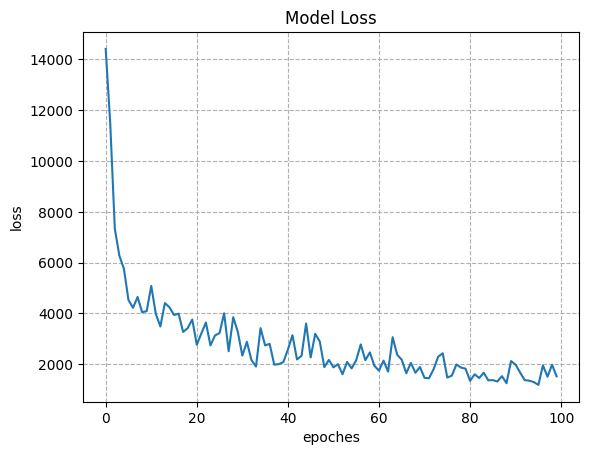

In [32]:
plt.plot(train_history)

plt.title('Model Loss')
plt.xlabel('epoches')
plt.ylabel('loss')
plt.grid(True, linestyle='--')

plt.show()

In [33]:
torch.save(model.state_dict(), 'model4.pth')

### 예측

In [53]:
test_target_date = {
  # 최소 2024-10-25
  "start_date": '2024-10-25',
  # 최대 2024-11-07
  "end_date": '2024-11-07',
}

predict_target_date = '2024-11-05'

##### 모델 불러오기

In [54]:
model_test = NeuralNetwork(input_size, output_size)

model_test.to(device)

model_test.load_state_dict(torch.load('model4.pth'))

C:\Users\ldh75\AppData\Local\Temp\ipykernel_24912\4006895719.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_test.load_state_dict(torch.load('model4.pth'))


<All keys matched successfully>

##### X 데이터

- 제주 기상 예측 1 (n+1)
- 제주 기상 예측 2 (n+1)
- 하루 전 시장 전기 예측 (n)
- 제주 전력 시장 실시간 (n-1)
- 제주 전력 시장 현황 (n-1)

In [55]:
dfs = [weather_forecast_1, weather_forecast_2, smp_da_x, smp_rt_rc, elec_supply]

test_data = reduce(lambda left, right: pd.merge(left, right, on='datetime', how='inner'), dfs)

target_day = datetime.strptime(predict_target_date, '%Y-%m-%d')

target_data = test_data.loc[
  (test_data['datetime'] > target_day) &
  (test_data['datetime'] <= target_day + timedelta(days=1))
]

test_data = test_data.loc[
  (test_data['datetime'] > datetime.strptime(test_target_date['start_date'], '%Y-%m-%d')) &
  (test_data['datetime'] <= datetime.strptime(test_target_date['end_date'], '%Y-%m-%d') + timedelta(days=1))
]

In [56]:
target_data

,datetime,temp_x,real_feel_temp,rel_hum,dew_point,wind_dir_x,wind_spd,wind_gust_spd,uv_idx,vis,...,하루전가격(원/kWh),실시간 임시 가격(원/kWh),실시간 확정 가격(원/kWh),공급능력(kW),현재 수요(kW),태양광 발전량kW),풍력 발전량(kW),신재생 발전량 총합(kW),공급 예비력(kW),운영 예비력(kW)
5865,2024-11-05 01:00:00,14.135811,10.123461,73.555556,9.506188,161.000000,30.488122,52.464633,0.000000,16.0934,...,103.98,100.874000,100.874000,1.128077e+06,506769.230769,0.000000,49740.376923,49910.230769,571153.846154,328538.461538
5866,2024-11-05 02:00:00,13.888900,9.814827,72.555556,9.074073,159.555556,29.862267,51.427511,0.000000,16.0934,...,87.53,90.686667,90.686667,1.124909e+06,479090.909091,0.000000,46735.536364,46992.654545,596000.000000,353000.000000
5867,2024-11-05 03:00:00,13.580233,9.567910,72.444444,8.827160,158.777778,28.843011,50.819533,0.000000,16.0934,...,87.42,87.392000,87.392000,1.136000e+06,465076.923077,0.000000,57687.215385,57943.815385,620615.384615,379538.461538
5868,2024-11-05 04:00:00,13.456778,9.444458,72.222222,8.456790,158.666667,28.431744,50.426133,0.000000,16.0934,...,86.95,87.213333,87.213333,1.135727e+06,457363.636364,0.000000,57016.754545,57190.263636,628090.909091,384000.000000
5869,2024-11-05 05:00:00,13.456778,9.444458,71.555556,8.395061,159.222222,27.609189,49.818156,0.000000,16.0934,...,87.27,89.432000,89.432000,1.138462e+06,462230.769231,0.000000,60370.353846,60490.107692,626076.923077,382538.461538
5870,2024-11-05 06:00:00,13.086411,9.444451,71.333333,8.148148,159.666667,26.983342,49.389000,0.000000,16.0934,...,102.49,92.450000,92.450000,1.150818e+06,480272.727273,0.000000,72965.809091,73085.245455,620636.363636,377909.090909
5871,2024-11-05 07:00:00,12.777778,8.888890,73.444444,8.148147,83.111111,27.805867,49.389000,0.000000,16.0934,...,104.14,92.550000,92.550000,1.115385e+06,493538.461538,545.529231,35658.007692,36347.138462,571846.153846,327615.384615
5872,2024-11-05 08:00:00,13.456789,10.308654,71.000000,8.333332,84.555556,27.591289,49.192300,1.000000,16.0934,...,115.78,96.676667,96.676667,1.169545e+06,475000.000000,29607.755455,61016.209091,90624.490909,646363.636364,398363.636364
5873,2024-11-05 09:00:00,14.506167,12.407404,66.444444,8.333332,85.555556,27.394600,48.977722,2.000000,16.0934,...,131.30,104.630000,104.630000,1.247692e+06,463076.923077,124886.069231,46579.207692,171465.846154,752769.230769,478000.000000
5874,2024-11-05 10:00:00,15.246933,13.580244,63.444444,8.333332,84.333333,27.394600,49.192300,2.888889,16.0934,...,149.56,104.630000,104.630000,1.311273e+06,486727.272727,197856.818182,40707.027273,238564.545455,807181.818182,521363.636364


In [57]:
predict_set = ElecDataset(target_data, Y.iloc[:24])

predict_dataloader = DataLoader(dataset=predict_set,
                        batch_size=24,
                        shuffle=False)

In [58]:
model_test.eval()

with torch.no_grad():
  for inputs, _ in predict_dataloader:
    inputs = inputs.to(device)
    predictions = model_test(inputs)

print(predictions)

tensor([[ 54.6755],
        [  0.4036],
        [  0.5653],
        [  0.5055],
        [  1.7419],
        [ 98.7775],
        [117.5217],
        [ 64.2156],
        [ 30.2197],
        [163.7382],
        [119.0266],
        [132.0973],
        [ 94.9542],
        [126.5783],
        [141.8749],
        [161.6860],
        [172.0654],
        [173.4432],
        [192.7737],
        [174.4632],
        [175.2655],
        [169.0092],
        [162.4889],
        [151.7129]], device='cuda:0', dtype=torch.float64)


In [59]:
flattened_list = predictions.view(-1).tolist()

print(flattened_list)

[54.67545512281277, 0.4036191940713137, 0.5653353431272283, 0.5055363469800563, 1.7418902176481348, 98.77751511778584, 117.52168504187495, 64.21560555204262, 30.219714179129436, 163.7382125529604, 119.02662692291057, 132.09732842204187, 94.95416162321884, 126.57832467119826, 141.87488897783427, 161.68599453731954, 172.06540723261116, 173.44319697148796, 192.7736629932811, 174.4632144099778, 175.26554207277258, 169.00924619566052, 162.48892614393165, 151.7129037271955]


##### 분석

예측결과

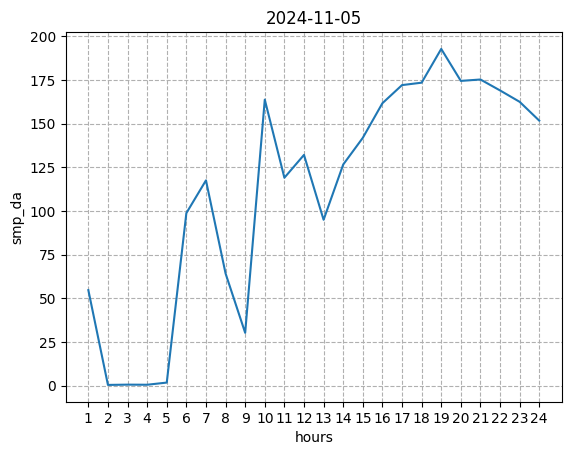

In [60]:
plt.plot(list(range(1, 25)), flattened_list)

plt.title(predict_target_date)
plt.xlabel('hours')
plt.ylabel('smp_da')
plt.xticks(list(range(1,25, 1)))
plt.grid(True, linestyle='--')

plt.show()